numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


In [65]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 


# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score 

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### 학습목표(데이터 전처리)
- 결측치 처리(missingno) , 이상치 처리(박스플롯)

- 데이터 인코딩(ml 문자열의 값을 입력값으로 허용하지 않는다) -> 숫자형 변환
- 인코딩 방법(레이블 인코딩, 원-핫-인코딩)
- 데이터 인코딩 회귀 X , 트리계열의 알고리즘에 적용할 경우 최적화 된다
- 트리계열의 알고리즘 중에서 성능이 떨어지는 단점이 있을 수 있다. - 숫자의 특성이 반영되기 때문에

- feature scaling -> 정규화, 표준화
- 정규화(0 ~ 1 사이의 값으로 변환 - MinMaxScalar )
- 표준화(정규분포를 따르는 형식으로 평균이 0 이고 분산이 1 가우시안 분포 변환 - StandardScaler)

- feature important

In [5]:
iris = load_iris()
print('type - ' , type(iris))
print('keys - ' , iris.keys() , type(iris.keys()))

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']) <class 'dict_keys'>


In [6]:
X_train, X_test , y_train, y_test = train_test_split(iris.data,
                                                     iris.target,
                                                     test_size = 0.2,
                                                     random_state = 200) 


In [7]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [9]:
print('불순도(impurity)  - 해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지 - ')
print('엔트로피(entropy) - 불순도를 수치적으로 나타낸 척도')
print('지니(gini)        - 불순도를 수치적으로 나타낸 척도')

gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini' , 'entropy'] , 
    'max_depth' : [1,2,3] , 
    'min_samples_split' : [2,3],
    'splitter'  : ['random' , 'best']
}



불순도(impurity)  - 해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지 - 
엔트로피(entropy) - 불순도를 수치적으로 나타낸 척도
지니(gini)        - 불순도를 수치적으로 나타낸 척도


In [10]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 - ') 
grid_tree = GridSearchCV(gscv_dtc_model     , 
                         param_grid = param ,
                         cv = 5 , 
                         refit = True) 


GridSearchCV를 이용한 최적의 모델을 만드는 방법 - 


In [11]:
grid_tree.fit(X_train, y_train)
grid_tree.cv_results_

{'mean_fit_time': array([0.00079641, 0.00040054, 0.00019822, 0.00039887, 0.00039892,
        0.00019941, 0.        , 0.00039864, 0.00039892, 0.00039897,
        0.00039892, 0.00039892, 0.00039892, 0.00039887, 0.00019946,
        0.00040426, 0.00020056, 0.00040379, 0.00027194, 0.00039344,
        0.00039921, 0.00039711, 0.00059853, 0.00039902]),
 'std_fit_time': array([0.00039822, 0.00049056, 0.00039644, 0.00048852, 0.00048858,
        0.00039883, 0.        , 0.00048823, 0.00048858, 0.00048864,
        0.00048858, 0.00048858, 0.00048858, 0.00048852, 0.00039892,
        0.00055284, 0.00040112, 0.00049454, 0.00054388, 0.00048194,
        0.00048894, 0.00048636, 0.0004887 , 0.00048869]),
 'mean_score_time': array([0.        , 0.        , 0.00039897, 0.00019951, 0.        ,
        0.00019941, 0.00019956, 0.00019951, 0.        , 0.00019941,
        0.00019941, 0.00019946, 0.00019951, 0.00019951, 0.        ,
        0.        , 0.00040264, 0.0001955 , 0.00020361, 0.00020528,
        0.000198

In [13]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000796,0.000398,0.000000,0.000000,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.541667,0.666667,0.583333,0.583333,0.608333,0.050000,24
1,0.000401,0.000491,0.000000,0.000000,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,18
2,0.000198,0.000396,0.000399,0.000489,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.458333,0.625000,0.616667,0.080795,23
3,0.000399,0.000489,0.000200,0.000399,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,18
4,0.000399,0.000489,0.000000,0.000000,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.833333,0.791667,0.791667,0.916667,0.850000,0.056519,12
5,0.000199,0.000399,0.000199,0.000399,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,3
6,0.000000,0.000000,0.000200,0.000399,gini,2,3,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.750000,0.916667,1.000000,0.791667,0.791667,0.850000,0.093541,12
7,0.000399,0.000488,0.000200,0.000399,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,3
8,0.000399,0.000489,0.000000,0.000000,gini,3,2,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.791667,1.000000,0.916667,0.791667,0.750000,0.850000,0.093541,12
9,0.000399,0.000489,0.000199,0.000399,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,7


In [14]:
score_frm[['params' , 'rank_test_score']]

,params,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",24
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",18
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",23
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",18
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",12
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",3
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",12
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",3
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",12
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",7


In [16]:
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ') 
print(grid_tree.best_score_)

최적의 파라미터 확인 - 
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'random'}

최적의 파라미터의 정확도 - 
0.95


In [49]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(X_test) 
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess  - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

acc    - 
 1.0


In [46]:
gscv_dtc_best_model = DecisionTreeClassifier()
gscv_dtc_best_model.fit(X_train, y_train)
y_pred = gscv_dtc_best_model.predict(X_test)
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess  - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

acc    - 
 1.0


In [50]:
import seaborn as sns

In [51]:
print('feature importance - ')
print(estimator.feature_importances_)

feature importance - 
[0.00000000e+00 5.36969512e-04 6.75047386e-03 9.92712557e-01]


In [53]:
for name, value in zip(iris.feature_names , estimator.feature_importances_) :
    print(name , '\t' , value)

sepal length (cm) 	 0.0
sepal width (cm) 	 0.0005369695118779345
petal length (cm) 	 0.006750473863608308
petal width (cm) 	 0.9927125566245137


<AxesSubplot:>

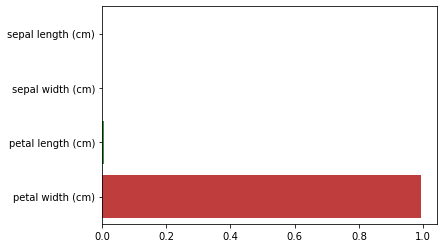

In [54]:
sns.barplot(x = estimator.feature_importances_ , y = iris.feature_names)

#### breast_cancer 데이터를 이용한 GridSearchCV [실습]

In [56]:
cancer = load_breast_cancer()
print('type - ' , type(cancer))
print('keys - ' , cancer.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [58]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [59]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [60]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [61]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [63]:
cancer_frm = pd.DataFrame(data = cancer.data , 
                          columns = cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
print('GridSearchCV - DecisionTreeClassifier - ') 
print('학습, 테스트 : 7 : 3 - ')
print('best estimator - ') 
print('학습, 예측 - ')
print('피처 중요도를 시각화 - ') 


#### 레이블 인코딩

In [68]:
label_items = ['집밥', '제육복음', 'ABC 쥬스', '샐러드', '낫또', '샐러드']
encoder = LabelEncoder()
labels = encoder.fit(label_items).transform(label_items)
print('labels - ', labels)
print('encoding class - ' , encoder.classes_) 
print('decoding - ' , encoder.inverse_transform(labels) )

labels -  [4 3 0 2 1 2]
encoding class -  ['ABC 쥬스' '낫또' '샐러드' '제육복음' '집밥']
decoding -  ['집밥' '제육복음' 'ABC 쥬스' '샐러드' '낫또' '샐러드']


#### 원-핫 인코딩

In [81]:
label_items = ['집밥', '제육복음', 'ABC 쥬스', '샐러드', '낫또', '샐러드']
encoder = LabelEncoder()
digit_labels = encoder.fit_transform(label_items)

print('type - ' , type(digit_labels) ) 
print('data - ' , digit_labels , digit_labels.shape)
print()

print('차원변환 - reshape')
digit_labels = digit_labels.reshape(-1,1)
print('shape - ' , digit_labels.shape)
print('data  - \n' , digit_labels)
print()

type -  <class 'numpy.ndarray'>
data -  [4 3 0 2 1 2] (6,)

차원변환 - reshape
shape -  (6, 1)
data  - 
 [[4]
 [3]
 [0]
 [2]
 [1]
 [2]]



In [82]:
print('One-Hot Encoding - ')
one_hot_encoder = OneHotEncoder() 
one_hot_encoder_frm = one_hot_encoder.fit_transform(digit_labels)
print('shape - '   , one_hot_encoder_frm.shape)
print('data  - \n' , one_hot_encoder_frm.toarray())

One-Hot Encoding - 
shape -  (6, 5)
data  - 
 [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [84]:
encoder_frm = pd.DataFrame({
    'label_items' : ['집밥', '제육복음', 'ABC 쥬스', '샐러드', '낫또', '샐러드']
})
encoder_frm

pd.get_dummies(encoder_frm)

,label_items_ABC 쥬스,label_items_낫또,label_items_샐러드,label_items_제육복음,label_items_집밥
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
5,0,0,1,0,0


#### 결측값 처리
- 결측값을 시각화 시켜주는 패키지 인스톨이 필용
- conda install -c conda-forge/label/cf202003 missingno

In [85]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
tmp_frm = pd.read_csv(csv_data)
tmp_frm

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [87]:
tmp_frm.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [89]:
import missingno as msno

<AxesSubplot:>

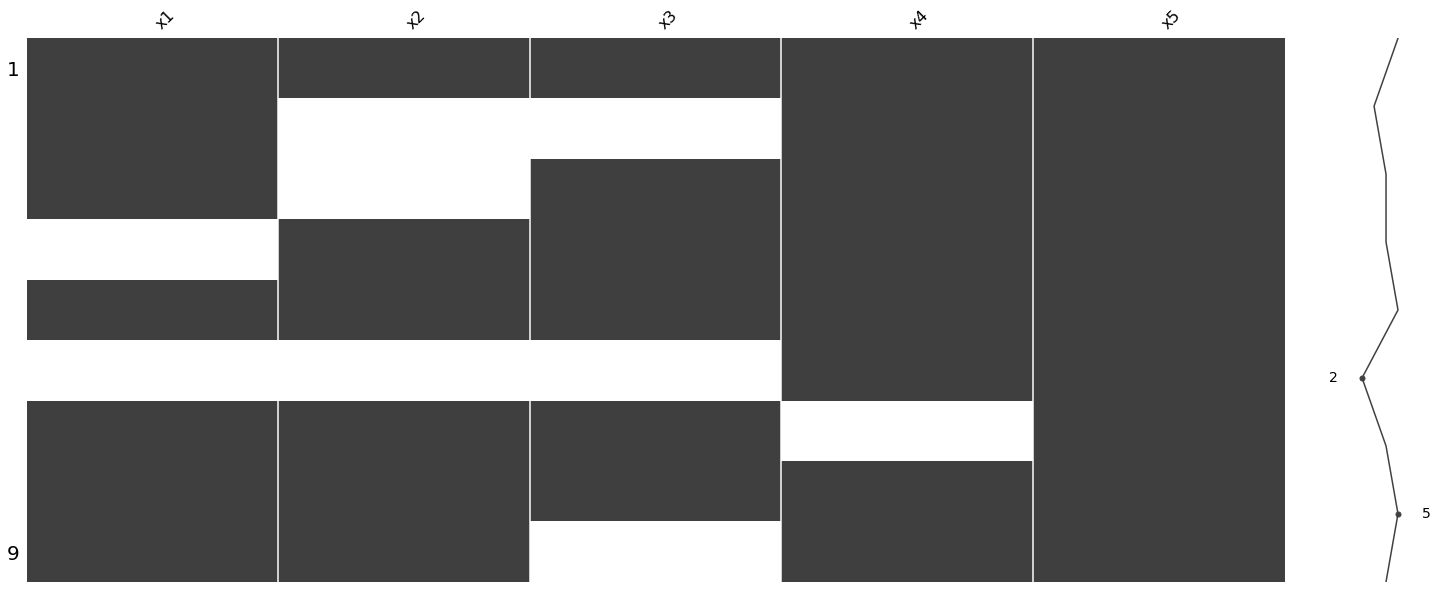

In [91]:
msno.matrix(tmp_frm)

<AxesSubplot:>

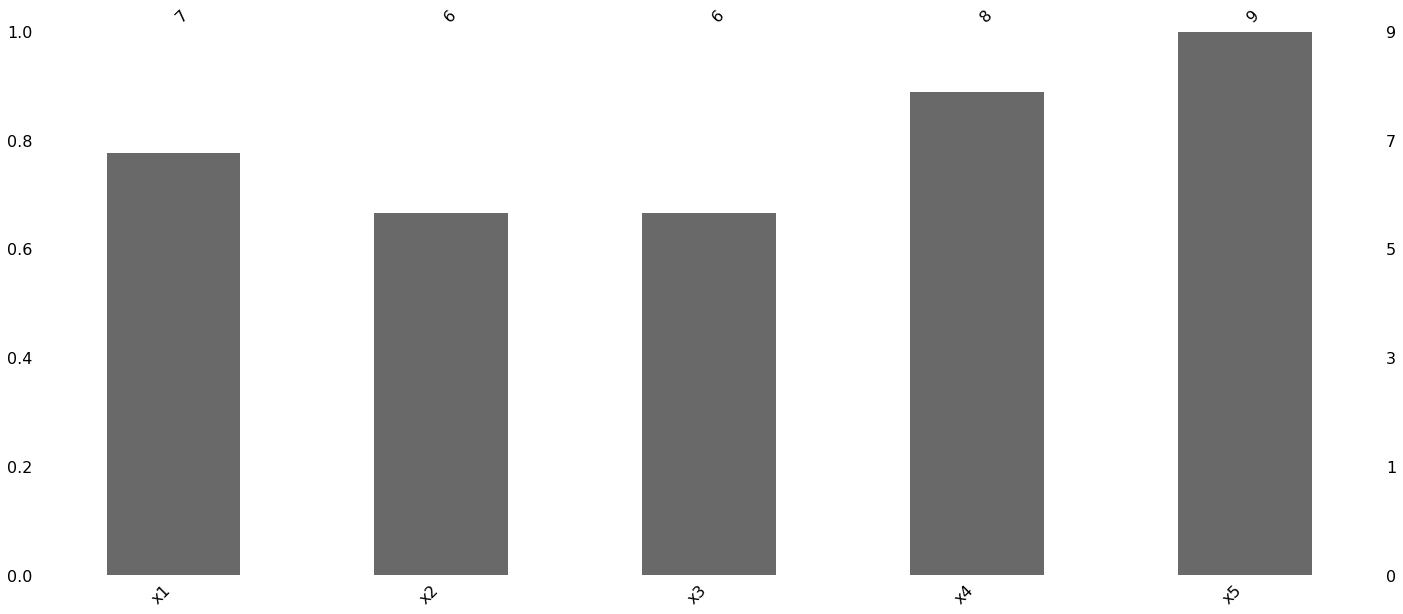

In [92]:
msno.bar(tmp_frm)

In [93]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [98]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:>

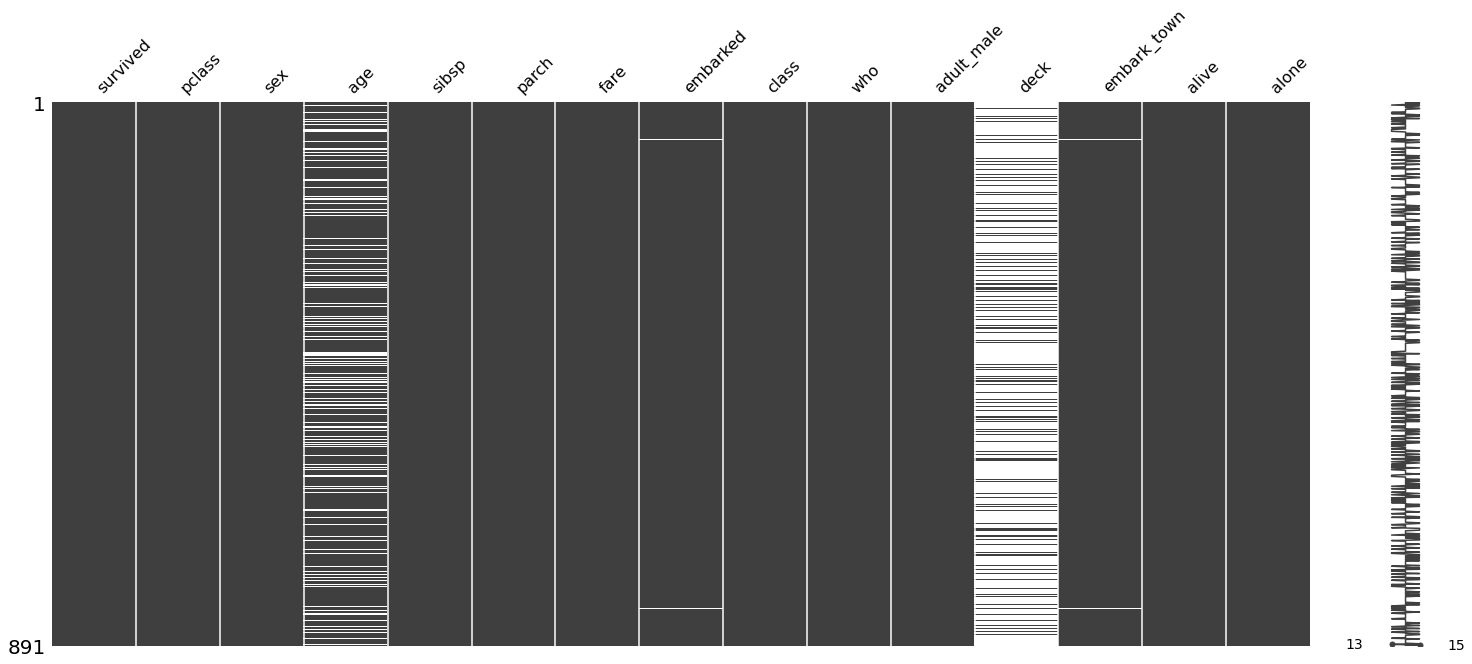

In [101]:
msno.matrix(titanic)

<AxesSubplot:>

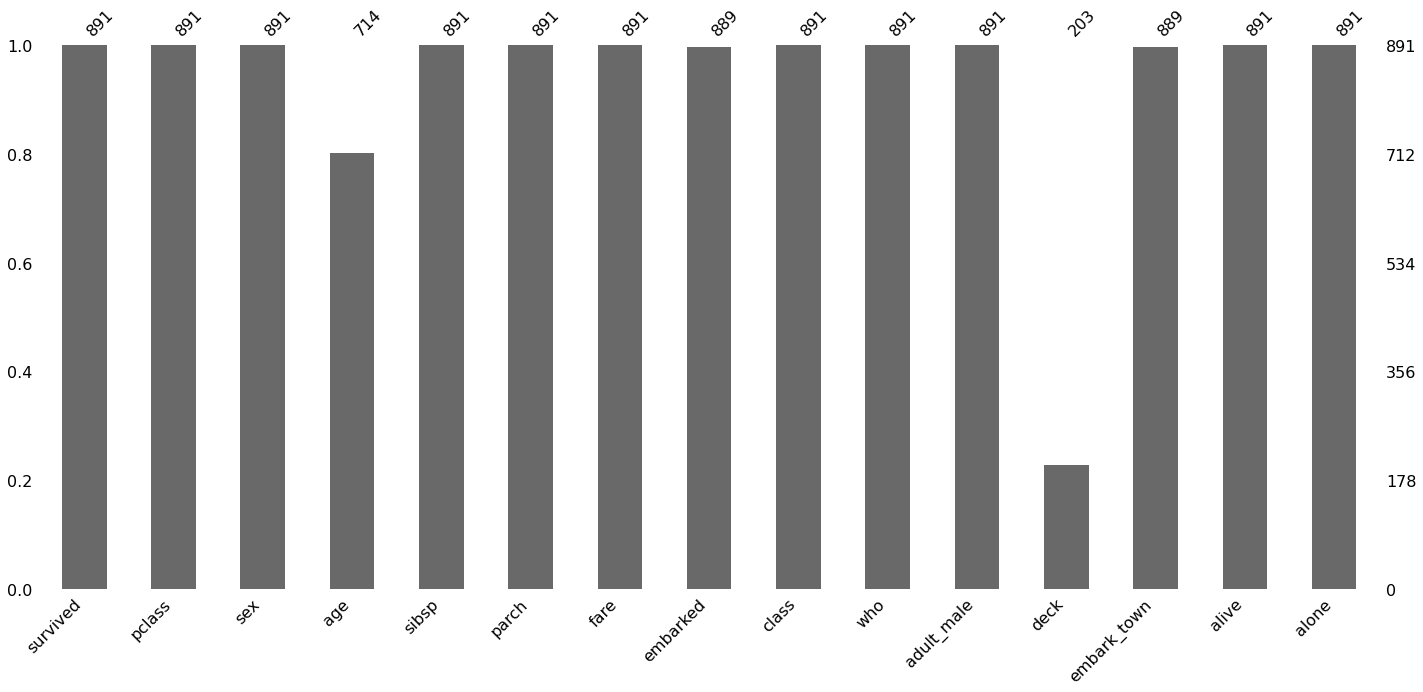

In [102]:
msno.bar(titanic)

In [103]:
tmp_frm

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [105]:
from sklearn.impute import SimpleImputer

In [107]:
print('결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 - ')
print('fit_transform') 
print()
imputer = SimpleImputer(strategy='most_frequent')

clean_frm = pd.DataFrame(imputer.fit_transform(tmp_frm) , 
                         columns = tmp_frm.columns)
clean_frm

결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 - 
fit_transform



,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,0.1,1.0,2019-01-02,B
2,3.0,0.1,3.0,2019-01-03,C
3,1.0,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,1.0,0.1,1.0,2019-01-06,C
6,7.0,0.7,7.0,2019-01-01,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,1.0,2019-01-09,C


In [111]:
print('titanic age의 결측값을 평균으로 대체한다면 - ')
imputer = SimpleImputer(strategy = 'mean')
titanic['age'] = imputer.fit_transform( titanic[['age']] ) 


titanic age의 결측값을 평균으로 대체한다면 - 


<AxesSubplot:>

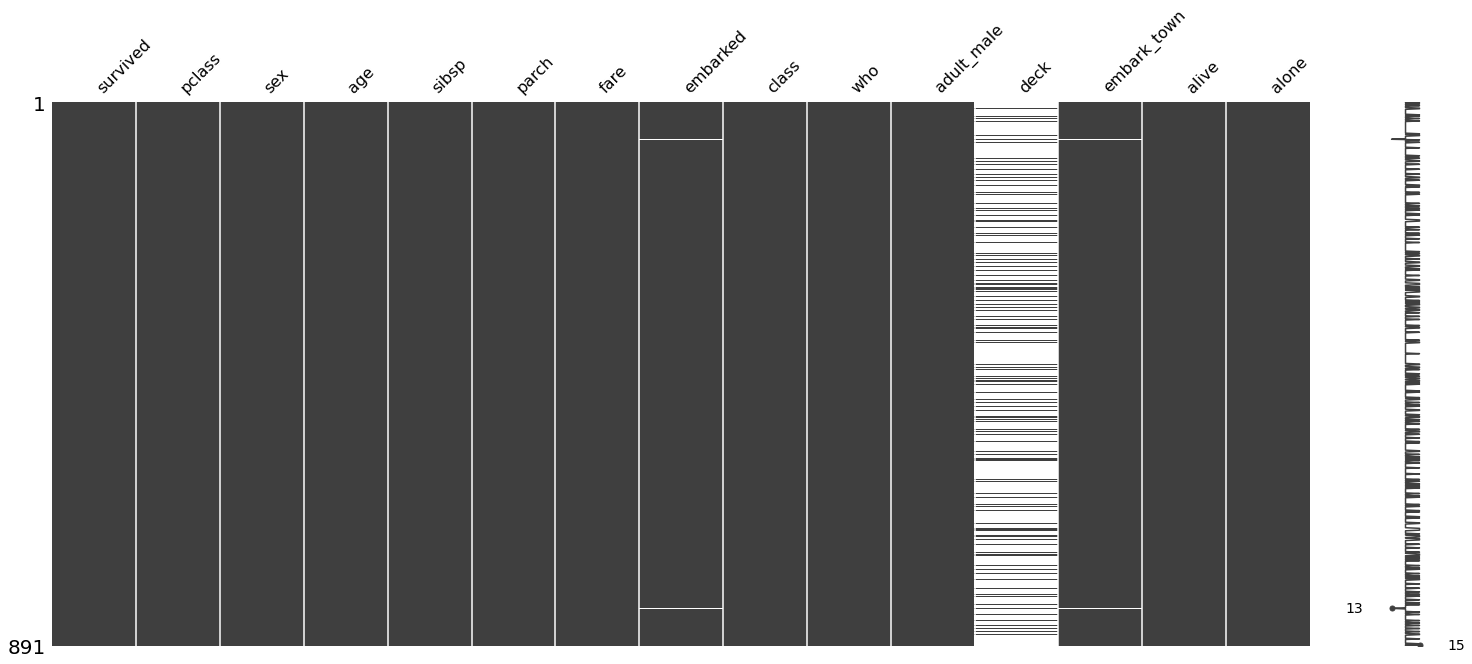

In [112]:
msno.matrix(titanic)

titanic deck의 결측값을 "D" 대체한다면 - 


<AxesSubplot:>

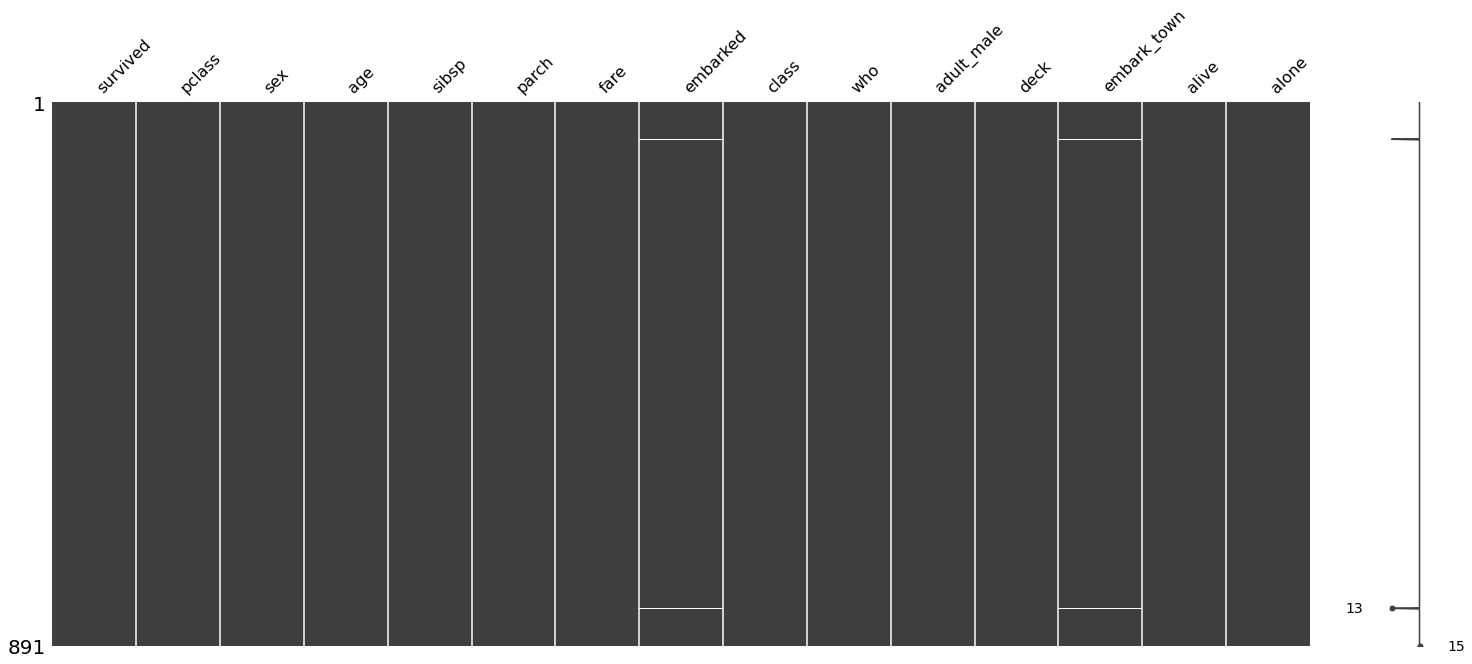

In [113]:
print('titanic deck의 결측값을 "D" 대체한다면 - ')
titanic['deck'] = titanic['deck'].fillna('D')
msno.matrix(titanic)

#### feature scaling

In [115]:
iris_frm = pd.DataFrame(data    = iris.data,
                        columns = iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [116]:
iris_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [117]:
iris_frm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [120]:
print('표준화 - StandardScaler')

s_scaler   = StandardScaler()
s_iris_frm = s_scaler.fit_transform(iris_frm)
s_iris_frm = pd.DataFrame(data = s_iris_frm , 
                          columns = iris.feature_names)
s_iris_frm

표준화 - StandardScaler


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [122]:
print('정규화 - MinMaxScaler')

m_scaler   = MinMaxScaler()
m_iris_frm = m_scaler.fit_transform(iris_frm)
m_iris_frm = pd.DataFrame(data = m_iris_frm , 
                          columns = iris.feature_names)
m_iris_frm

정규화 - MinMaxScaler


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#### 스케일링시 주의할 점!!! (중요)

In [129]:
print('예제를 통한 문제점 파악!!') 
print()
print()
X_train = np.arange(0, 11).reshape(-1,1)
print('train - \n' , X_train)
print('train shape - ' , X_train.shape)
print()
X_test  = np.arange(0, 6).reshape(-1,1)
print('test - \n' , X_test)
print('test shape - ' , X_test.shape)


예제를 통한 문제점 파악!!


train - 
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
train shape -  (11, 1)

test - 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
test shape -  (6, 1)


In [132]:
print('학습데이터의 정규화 - ') 
train_scaler   = MinMaxScaler()
m_train_scaler = train_scaler.fit_transform(X_train)
print()
print('원본 데이터   - ' , X_train.reshape(-1))
print('정규화 데이터 - ' , m_train_scaler.reshape(-1))

학습데이터의 정규화 - 

원본 데이터   -  [ 0  1  2  3  4  5  6  7  8  9 10]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [133]:
print('테스트데이터의 정규화 - ') 
test_scaler   = MinMaxScaler()
m_test_scaler = test_scaler.fit_transform(X_test)
print()
print('원본 데이터   - ' , X_test.reshape(-1))
print('정규화 데이터 - ' , m_test_scaler.reshape(-1))

테스트데이터의 정규화 - 

원본 데이터   -  [0 1 2 3 4 5]
정규화 데이터 -  [0.  0.2 0.4 0.6 0.8 1. ]


In [134]:
print('스케일링의 문제를 해결하기 위해서는 학습데이터를 기준으로 테스트 데이터를 스케일링 해야한다!!!')

스케일링의 문제를 해결하기 위해서는 학습데이터를 기준으로 테스트 데이터를 스케일링 해야한다!!!


In [137]:
print('학습데이터의 정규화 - ') 
scaler   = MinMaxScaler()
scaler.fit(X_train)
m_train_scaler = scaler.transform(X_train)
print()
print('원본 데이터   - ' , X_train.reshape(-1))
print('정규화 데이터 - ' , m_train_scaler.reshape(-1))
print()
print()
print('테스트데이터의 정규화 - ') 
m_test_scaler = scaler.transform(X_test)
print()
print('원본 데이터   - ' , X_test.reshape(-1))
print('정규화 데이터 - ' , m_test_scaler.reshape(-1))

학습데이터의 정규화 - 

원본 데이터   -  [ 0  1  2  3  4  5  6  7  8  9 10]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


테스트데이터의 정규화 - 

원본 데이터   -  [0 1 2 3 4 5]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5]


#### 스케일링 [실습]
- 스케일링 전 모델 학습
- 스케일링 후 모델 학습 - 정규화, 표준화

In [139]:
sample_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' , 
                                   header  = None , 
                                   usecols = [0, 2, 13])
sample_frm.columns = ['target' , 'x' , 'y']
sample_frm

,target,x,y
0,1,1.71,1065
1,1,1.78,1050
2,1,2.36,1185
3,1,1.95,1480
4,1,2.59,735
...,...,...,...
173,3,5.65,740
174,3,3.91,750
175,3,4.28,835
176,3,2.59,840


#### 이상치

In [180]:
tips = sns.load_dataset('tips')
print('type - ' , type(tips))

type -  <class 'pandas.core.frame.DataFrame'>


In [181]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

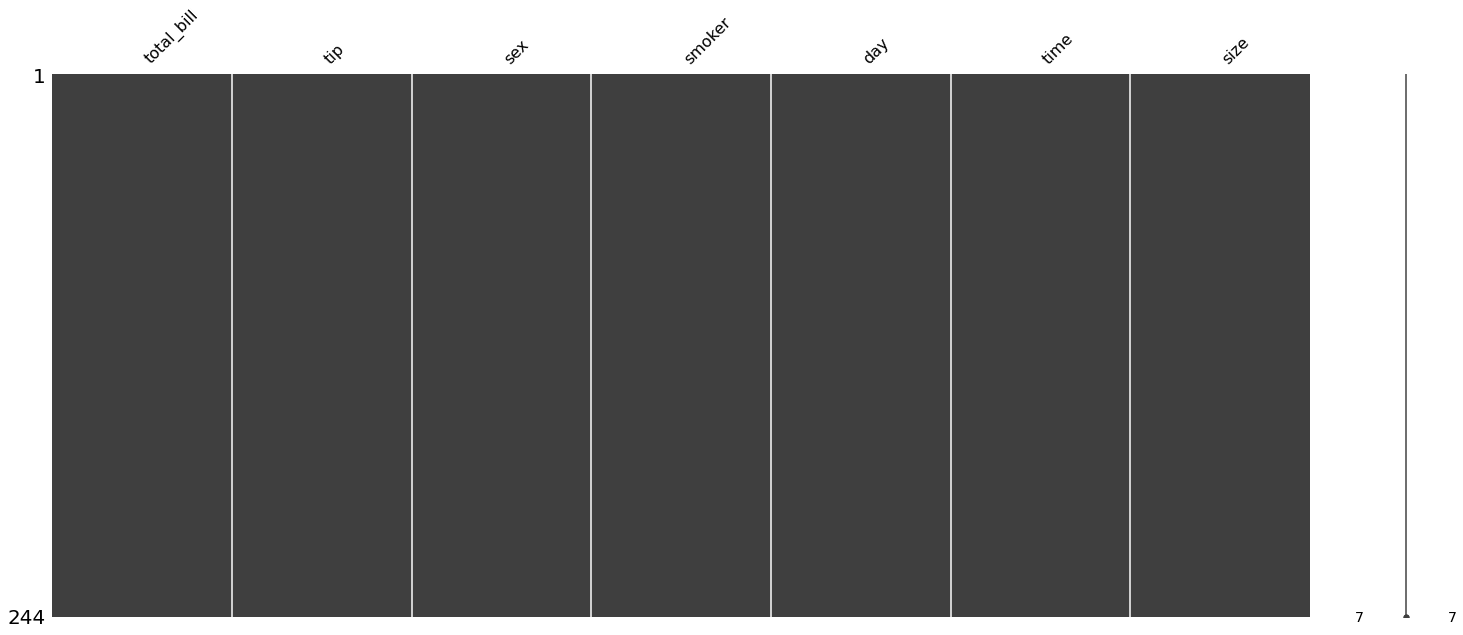

In [183]:
msno.matrix(tips)

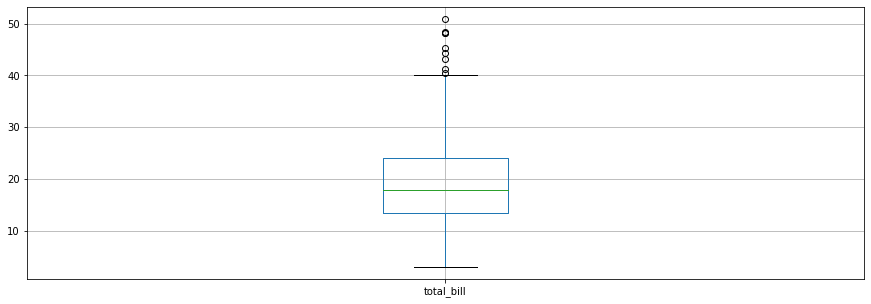

In [184]:
plt.figure(figsize=(15,5))

tips.boxplot(column = ['total_bill'])

plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


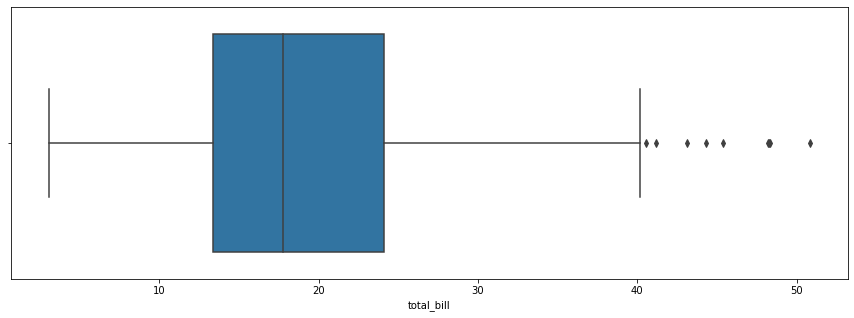

In [185]:
plt.figure(figsize=(15,5))

sns.boxplot(tips['total_bill'])

plt.show()
plt.close()

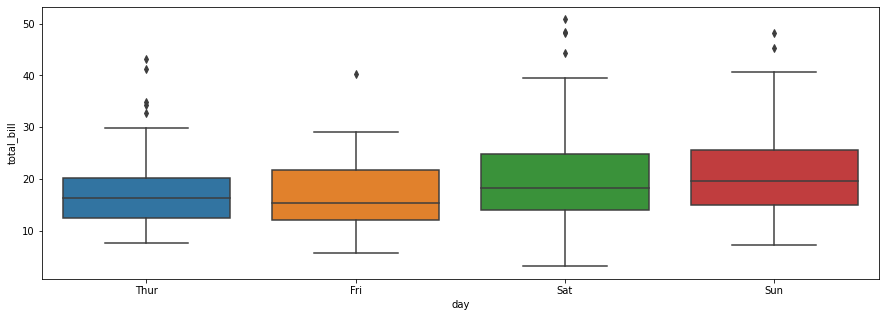

In [186]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            data = tips)

plt.show()
plt.close()

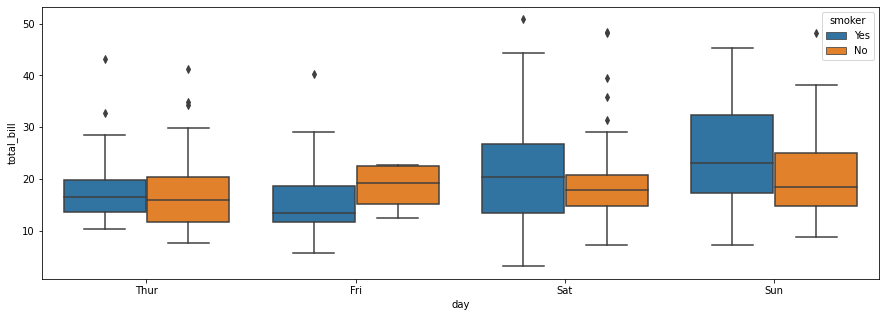

In [187]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            hue = 'smoker',
            data = tips)

plt.show()
plt.close()

In [188]:
print('1. 이상치 값 제거')
print('2. 이상치 값 변환 - NaN 변환 후 대체값으로 처리')

1. 이상치 값 제거
2. 이상치 값 변환 - NaN 변환 후 대체값으로 처리


In [189]:
q1 = tips['tip'].quantile(0.25)
q3 = tips['tip'].quantile(0.75)

# IQR
iqr = 1.5 * (q3-q1)


In [190]:
def removeQutlier(frm, column) :
    q1 = frm[column].quantile(0.25)
    q3 = frm[column].quantile(0.75)
    
    tmp_frm = frm
    # IQR
    iqr = 1.5 * (q3-q1)
    tmp_frm[column][ (tmp_frm[column] > (q3 + iqr)) | (tmp_frm[column] < (q1 - iqr))] = None 
    
    return tmp_frm 

C:\Users\HPE\AppData\Local\Temp/ipykernel_13240/416220511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_frm[column][ (tmp_frm[column] > (q3 + iqr)) | (tmp_frm[column] < (q1 - iqr))] = None


<AxesSubplot:>

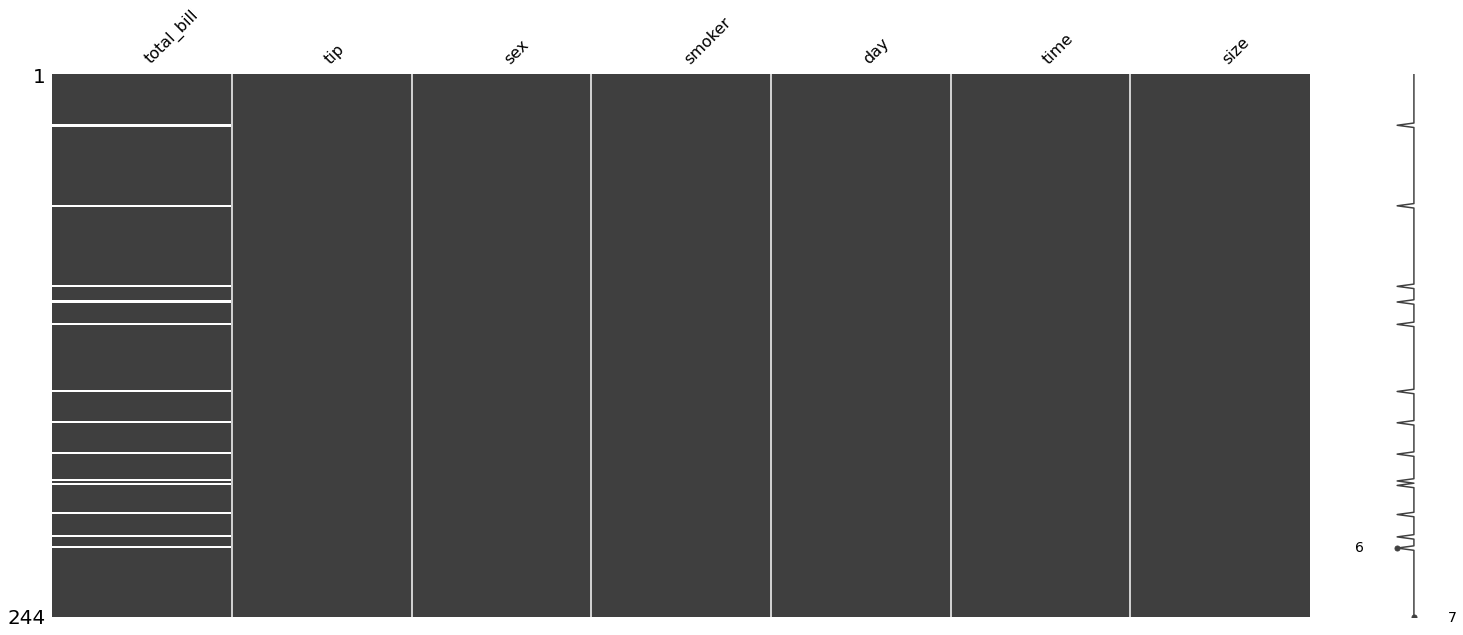

In [193]:
outlier_frm = removeQutlier(tips, 'total_bill')
msno.matrix(outlier_frm)


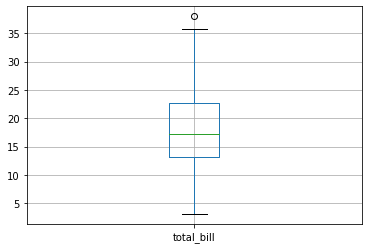

In [194]:
outlier_frm.boxplot(column='total_bill')
plt.show()
plt.close()